In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
data = pd.read_csv("loan.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#reading the data
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#checking the size of the data
data.shape

(39717, 111)

In [5]:
#checking the empty values
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
#there are many null values first we remove the null data
data.dropna(axis = 1, how = 'all', inplace = True)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [7]:
#there is some data in csv which is not useable so we can remove it
data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [8]:
#there are some more columns which is not useable.
#some of the columns which is realated to the post approval loan.
#some of the column like id,member_id,url,title,emp_title,zip_code,last_credit_pull_d,addr_state which is not relevant to loan defaulting so we are removing them.
#desc colmun which is description of loan description provided by borrower is not needed so we removing them

In [9]:
data.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [10]:
data.shape

(39717, 21)

In [11]:
data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

In [12]:
#We won't be able to compensate for the current loans.
#Remove the records with current loan status to exclude that data.
data = data[data.loan_status != "Current"]
data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [13]:
#checking for the missing values
data.isna().sum()/len(data.index)*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

In [14]:
#missing values are present in the data which are:
#emp_length
#revol_util

In [15]:
#checking type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

In [16]:
#The frequency of the mode value is significantly greater than that of the next most frequent value, as seen by the above value counts.
#This means we can safely set the mode value to the column's null values.
#Also, the fraction of missing values is relatively low. As a result, computing with a mode value has little impact on the analysis.

In [17]:
data.emp_length.fillna(data.emp_length.mode()[0], inplace = True)
data.emp_length.isna().sum()

0

In [18]:
data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
data.revol_util.isna().sum()

0

In [19]:
#Data standardisation
#Despite being specified as an object column, the "revol util" column has continus values.
data.revol_util = pd.to_numeric(data.revol_util.apply(lambda x : x.split('%')[0]))

In [20]:
#now we are standardizing the data in this column
data.int_rate = pd.to_numeric(data.int_rate.apply(lambda x : x.split('%')[0]))

In [21]:
#"emp length" less than 1 is considered to be 0 and 10+ years to be 10.
data.emp_length = pd.to_numeric(data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [22]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

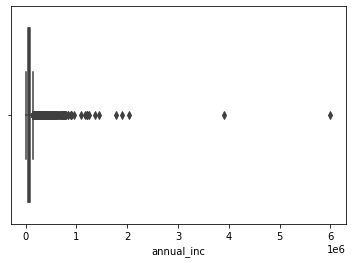

In [23]:
#sns plotting
sns.boxplot(data['annual_inc'])

In [24]:
#The numbers beyond the 95th percentile appear to be deviated from the usual distribution, and the value for small quantile variation increases dramatically.
#Assuming a 0.95 threshold for excluding outliers
quantile_info = data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [25]:
per_95_annual_inc = data['annual_inc'].quantile(0.95)
data = data[data.annual_inc <= per_95_annual_inc]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

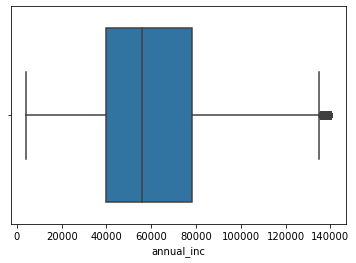

In [26]:
sns.boxplot(data.annual_inc)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dti'>

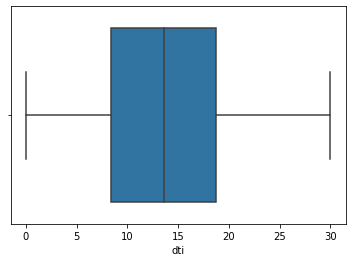

In [27]:
#Examine other numerical variables that may contain outliers.
#dti
#loan_amnt
#funded_amnt_inv
sns.boxplot(data.dti)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

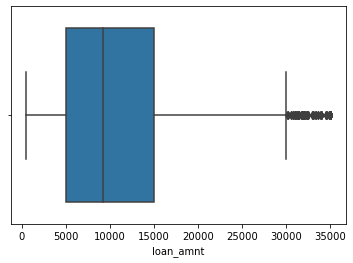

In [28]:
sns.boxplot(data.loan_amnt)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='funded_amnt_inv'>

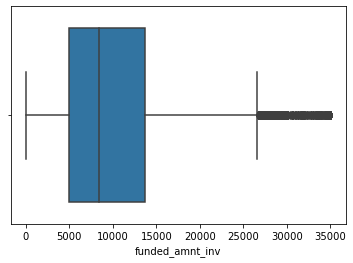

In [29]:
sns.boxplot(data.funded_amnt_inv)

In [30]:
data.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8396.342174
0.750    13649.999283
0.900    19750.000000
0.950    23949.287805
0.970    24975.000000
0.975    25350.000000
0.980    27953.287538
0.985    29925.000000
0.990    31966.803281
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

In [31]:
#There are some values that are outside of the distribution, but the distribution is quite consistent, thus there is no need to delete outliers or extreme values for these columns.

<AxesSubplot:xlabel='loan_status', ylabel='count'>

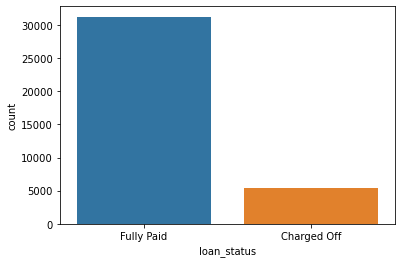

In [32]:
#Only the defaulter data is being analysed and visualised. So, for the charts below, subset the data and plot only the 'Charged Off' loan status.
sns.countplot(x = 'loan_status', data = data)

In [33]:
data.sub_grade = pd.to_numeric(data.sub_grade.apply(lambda x : x[-1]))
data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

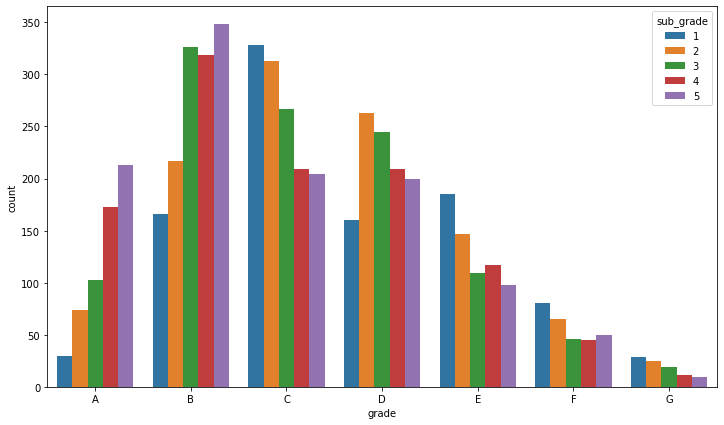

In [34]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = data[data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='grade', ylabel='count'>

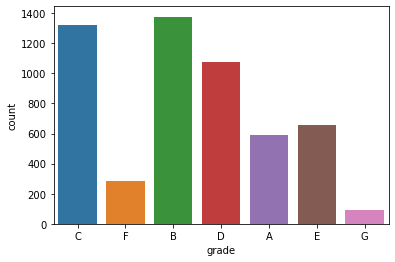

In [35]:
sns.countplot(x = 'grade', data = data[data.loan_status == 'Charged Off'])


In [36]:
#Checking unique home_ownership values
data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [37]:
#replacing 'NONE' with 'OTHERS'
data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [38]:
#checking unique value for home_ownership
data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

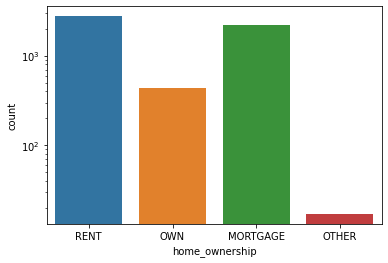

In [39]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=data[data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='count', ylabel='purpose'>

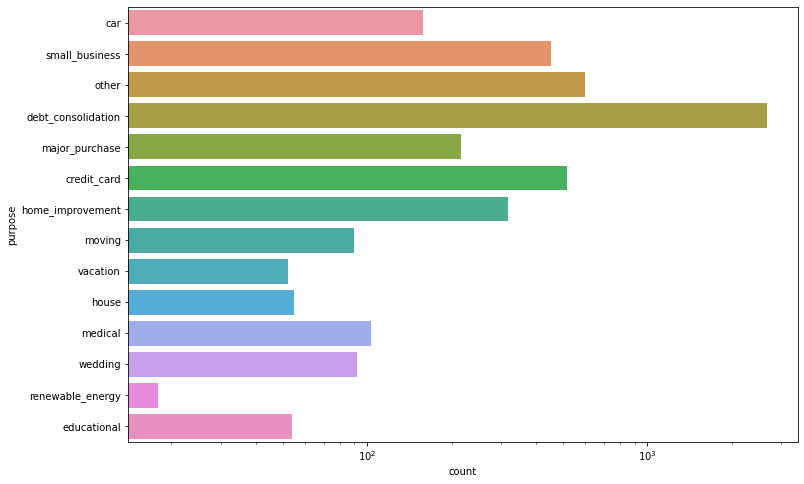

In [40]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=data[data.loan_status == 'Charged Off'])

In [41]:
#To make a numerical variable categorical, create bins for it
#creating bins for int_rate,open_acc,revol_util,total_acc
data['int_rate_groups'] = pd.cut(data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
data['open_acc_groups'] = pd.cut(data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
data['revol_util_groups'] = pd.cut(data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
data['total_acc_groups'] = pd.cut(data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
data['annual_inc_groups'] = pd.cut(data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [42]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,1,3,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,5,3,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,2,2,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,1,10,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,3,9,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k


<AxesSubplot:xlabel='emp_length', ylabel='count'>

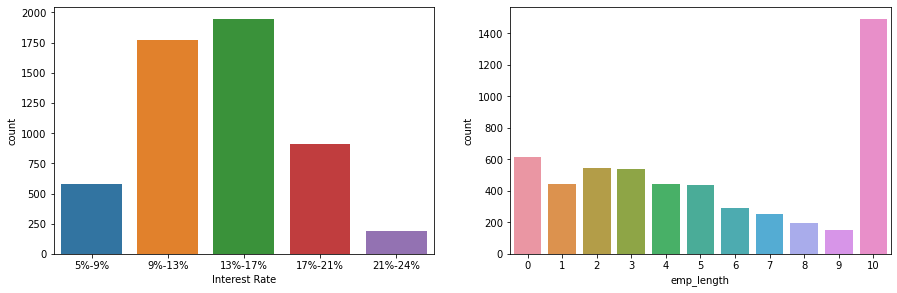

In [43]:
#Examining interest rate with respect to  the interest rate bins created
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=data[data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=data[data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='open_acc_groups', ylabel='count'>

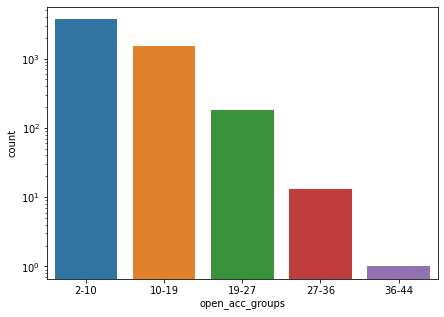

In [44]:
#also examinig open_acc,revol_util,total_acc,annual_inc
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=data[data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='revol_util_groups', ylabel='count'>

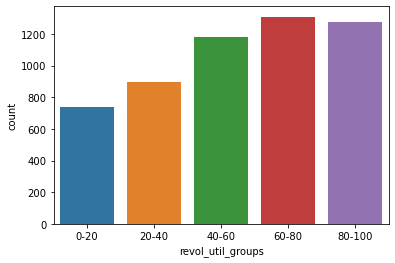

In [45]:
sns.countplot(x='revol_util_groups', data=data[data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='total_acc_groups', ylabel='count'>

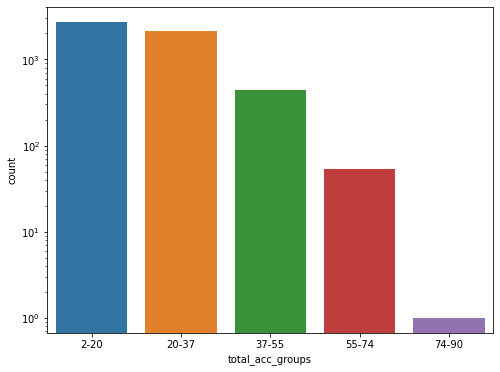

In [46]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=data[data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='annual_inc_groups', ylabel='count'>

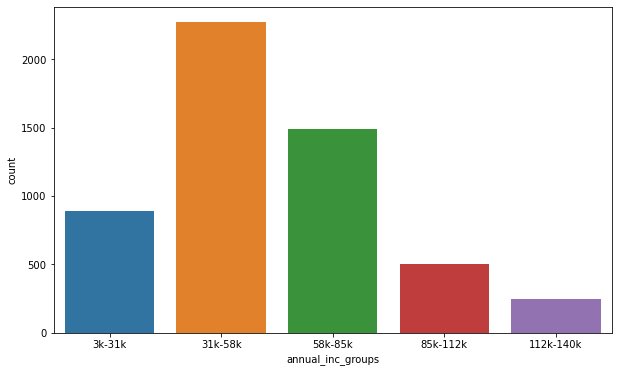

In [47]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=data[data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='count', ylabel='term'>

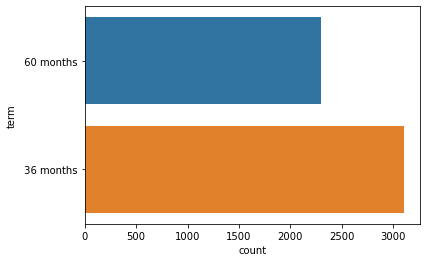

In [48]:
sns.countplot(y='term', data=data[data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='verification_status', ylabel='count'>

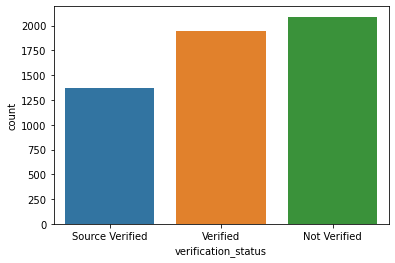

In [49]:
sns.countplot(x='verification_status', data=data[data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

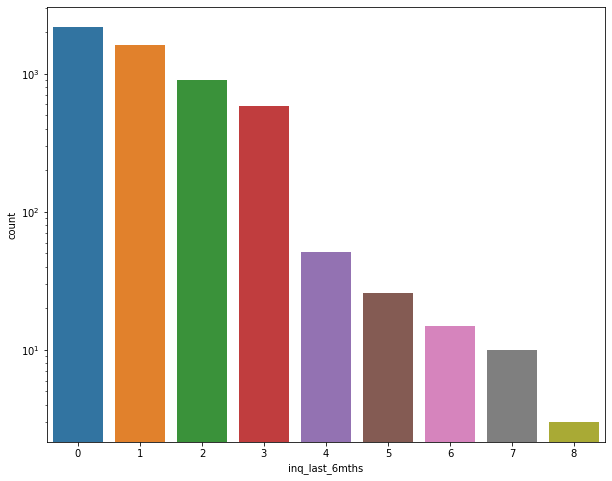

In [50]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=data[data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='pub_rec', ylabel='count'>

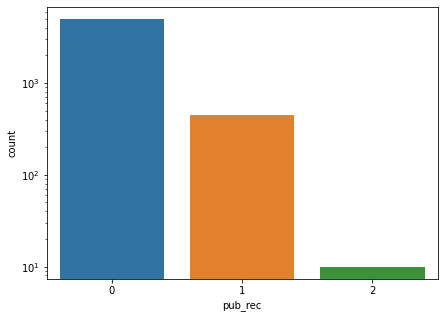

In [51]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=data[data['loan_status']=='Charged Off'])

In [52]:
#examining by month and year of issue
#Extracting month and year
df_month_year = data['issue_d'].str.partition("-", True)     
data['issue_month']=df_month_year[0]                       
data['issue_year']='20' + df_month_year[2]

<AxesSubplot:xlabel='issue_year', ylabel='count'>

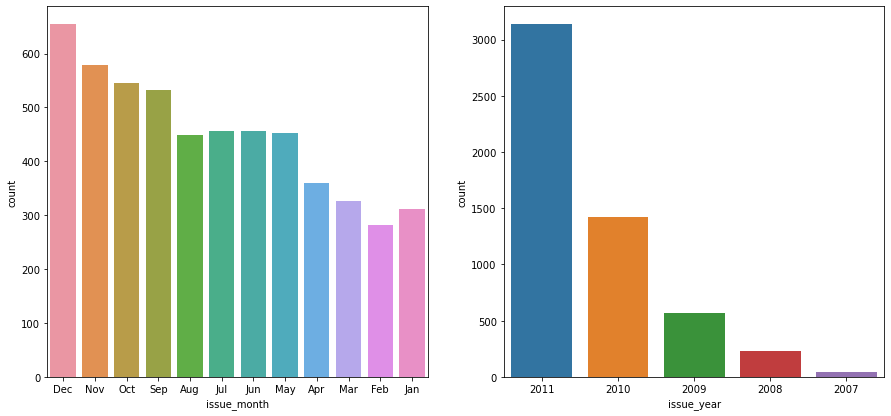

In [53]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=data[data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=data[data['loan_status']=='Charged Off'])

In [54]:
#When the loan was sanctioned/issued in December, there were the most defaults. 
#When compared to previous years, loans issued in 2011 were also higher.

In [55]:
#examining installment,dti, loan_amnt
data['installment_groups'] = pd.cut(data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
data['funded_amnt_inv_group'] = pd.cut(data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
data['loan_amnt_groups'] = pd.cut(data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
data['dti_groups'] = pd.cut(data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<AxesSubplot:xlabel='funded_amnt_inv_group', ylabel='count'>

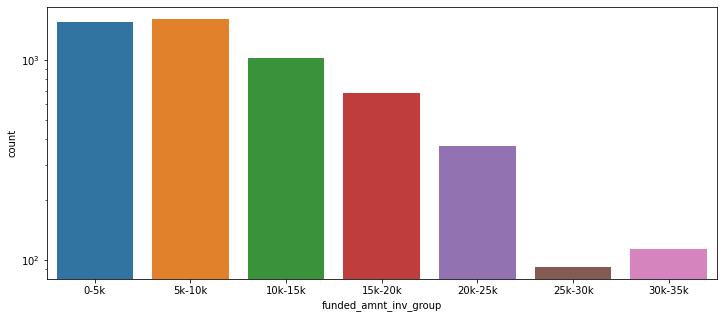

In [56]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=data[data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='count'>

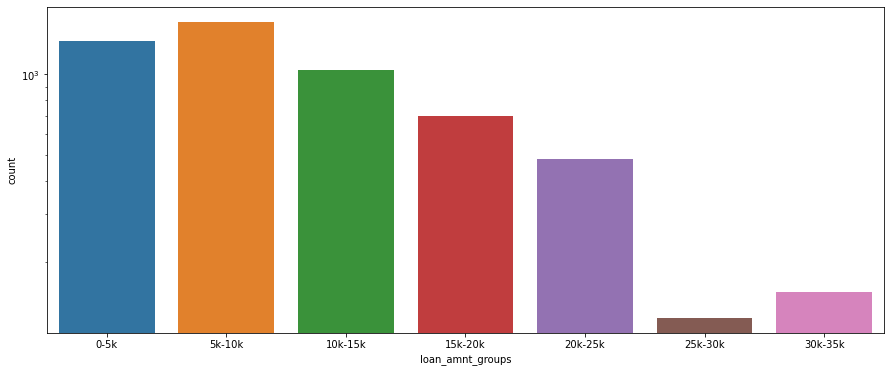

In [57]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=data[data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='dti_groups', ylabel='count'>

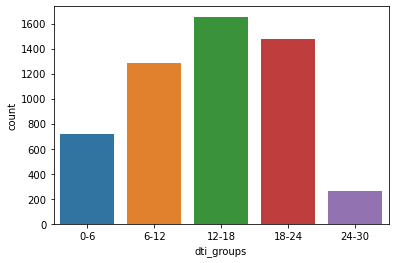

In [58]:
sns.countplot(x='dti_groups', data=data[data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='installment_groups', ylabel='count'>

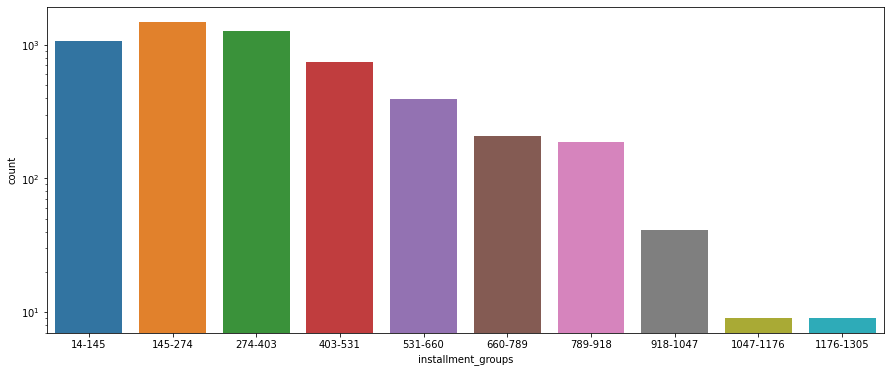

In [59]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=data[data['loan_status']=='Charged Off'])

In [60]:
#The results of the preceding study for each variable in terms of charged-off loans imply the following. When there is a higher chance of defaulting
#Applicants whose home ownership status is 'RENT'
#Those that utilise the loan to pay off other debts
#Applicants who obtain a 13-17 percent interest rate
#Applicants with incomes between 31201 and 58402
#Applicants with 20-37 open accounts
#Applicants having a ten-year employment history
#When the amount invested by the investor is between 5,000-10,000
#The loan amount ranges from 5429 to 10357.
#Dti ranges from 12 to 18.
#When the monthly instalments range from 145-274
#36-month contract
#When the loan status is unknown
#When there have been no inquiries in the last six months and there are no unfavourable public documents
#When the goal is to consolidate debt
#The grade is 'B,' with a total grade of 'B5'.

In [61]:
#There's also an intriguing observation from the date of issue. 
#The possibility of default was significant in the latter months of the year.

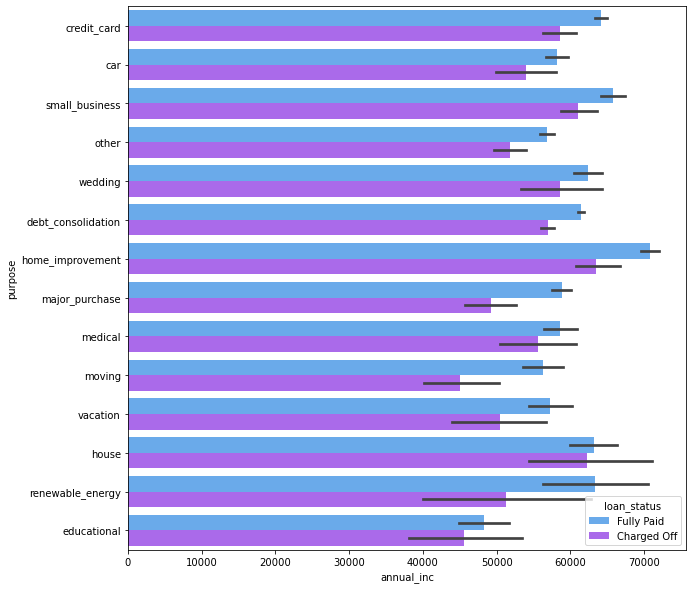

In [62]:
#For more information, combine annual income with other columns
#Annual income vs loan purpose
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='annual_inc', y='purpose', hue ='loan_status',palette="cool")
plt.show()

In [63]:
#Despite the fact that the number of loans applied for and defaulted is the largest for "debt_consolation," the annual income of individuals who applied isn't.

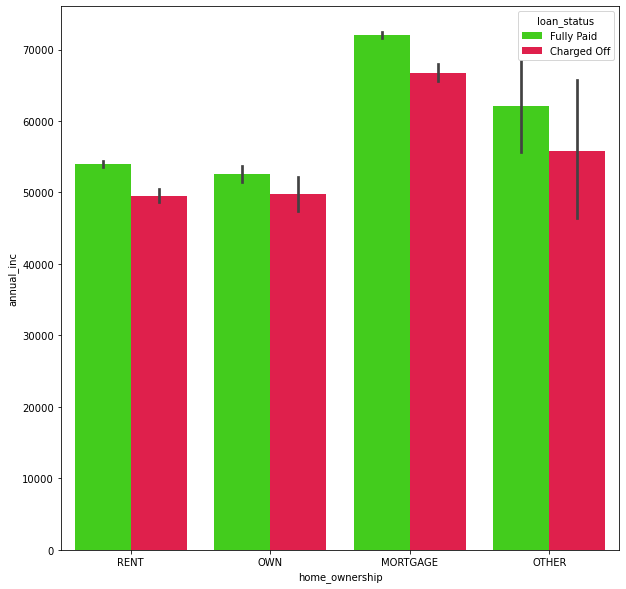

In [64]:
#Annual income vs home ownership
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="prism")
plt.show()

<AxesSubplot:xlabel='annual_inc_groups', ylabel='loan_amnt'>

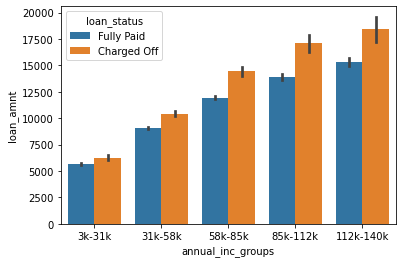

In [65]:
#Annual Income vs Loan amount
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = data)

In [66]:
#The loan amount is higher for persons who defaulted across all income levels.

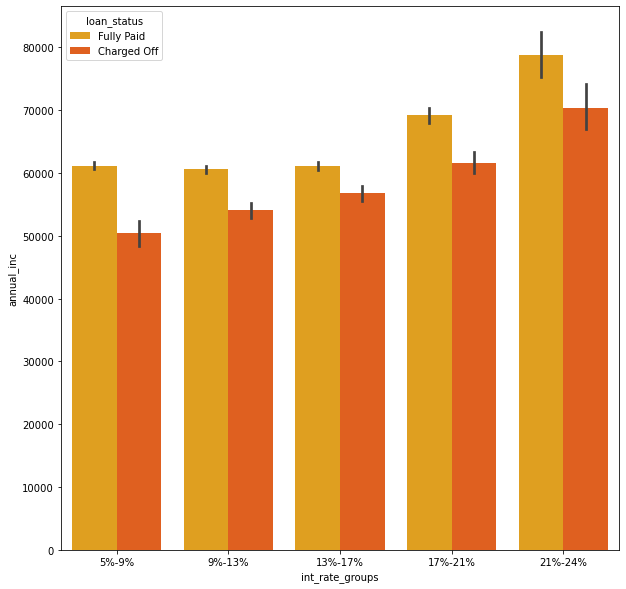

In [67]:
# Annual income vs int_rate
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="autumn_r")
plt.show()

In [68]:
#For more information, combine loan amount with other columns

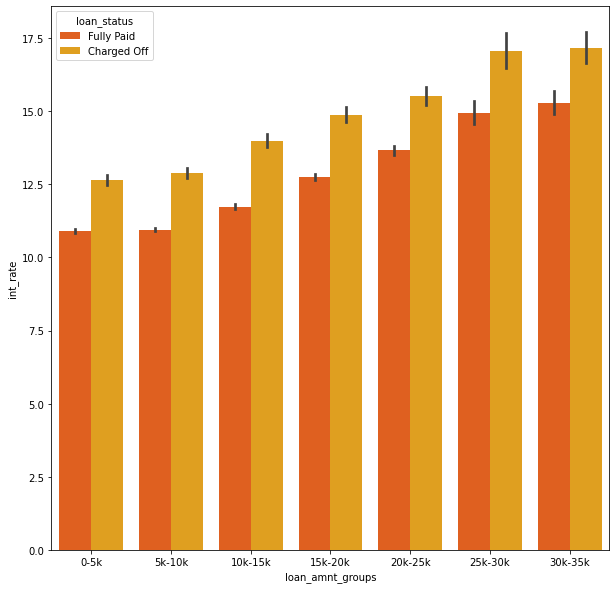

In [69]:
#Loan Amount vs Interest Rate
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="autumn")
plt.show()

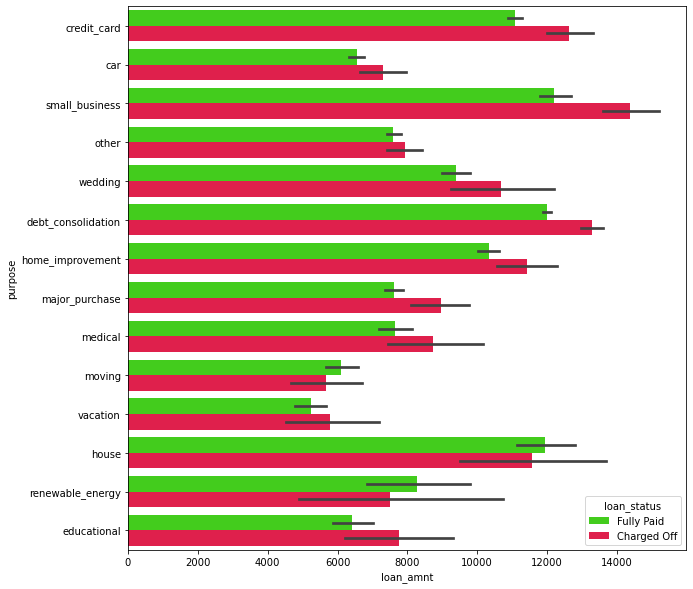

In [70]:
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='loan_amnt', y='purpose', hue ='loan_status',palette="prism")
plt.show()

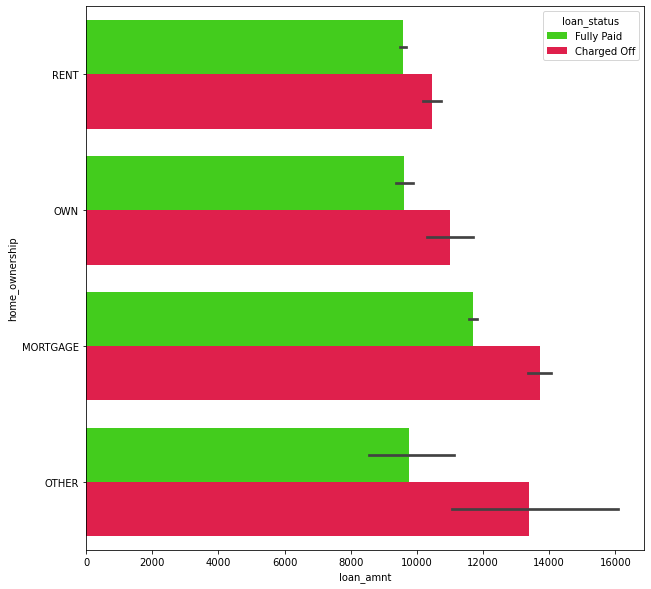

In [71]:
#Loan vs House Ownership
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="prism")
plt.show()

<AxesSubplot:xlabel='issue_year', ylabel='loan_amnt'>

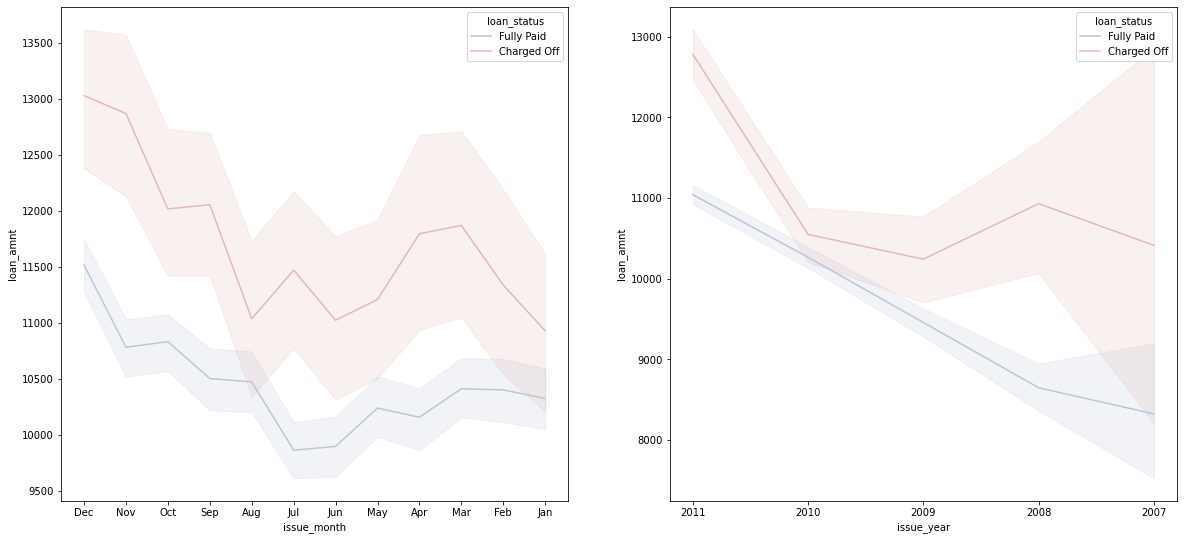

In [72]:
#Loan amount vs month issued and year issued
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =data,y='loan_amnt', x='issue_month', hue ='loan_status',palette="vlag")
plt.subplot(222)
sns.lineplot(data =data,y='loan_amnt', x='issue_year', hue ='loan_status',palette="vlag")

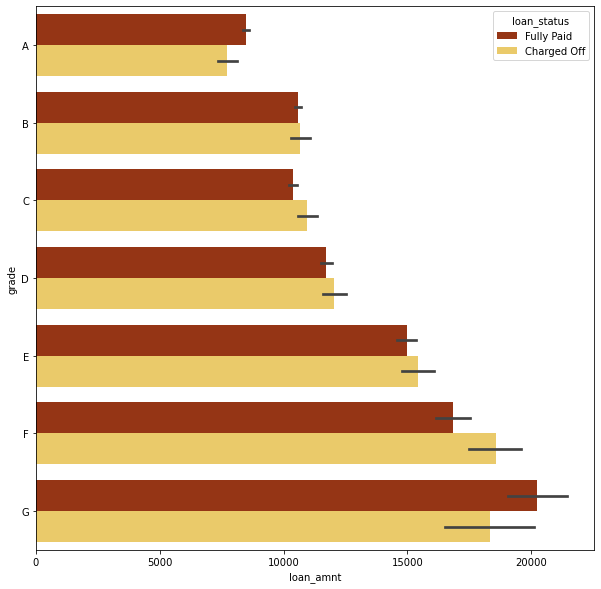

In [73]:
#Loan amount vs Grade
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='loan_amnt', y='grade', hue ='loan_status',palette="afmhot", order=['A','B','C','D','E','F','G'])
plt.show()

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

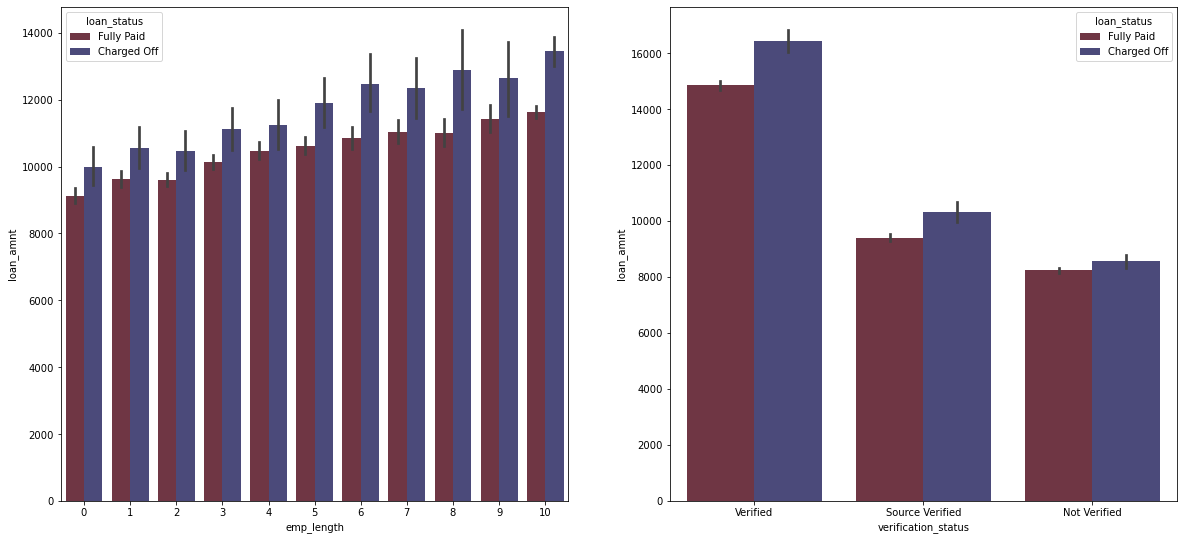

In [74]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =data,y='loan_amnt', x='emp_length', hue ='loan_status',palette="icefire_r")
plt.subplot(222)
sns.barplot(data =data,y='loan_amnt', x='verification_status', hue ='loan_status',palette="icefire_r")

In [75]:
#Employees with more work history were approved for a greater loan amount.

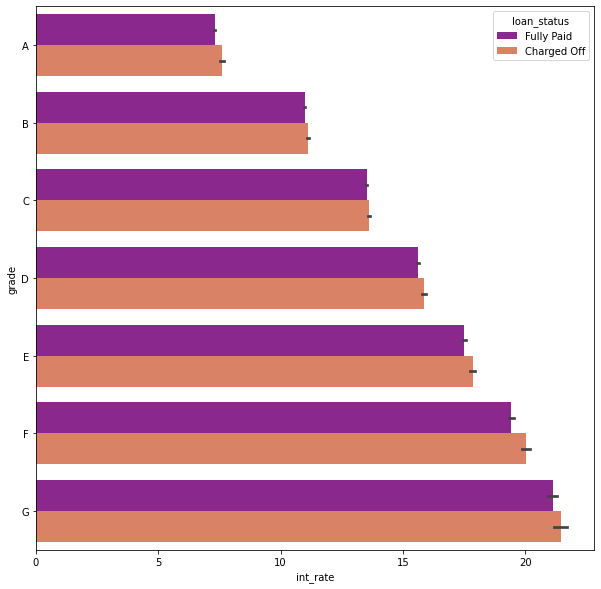

In [76]:
#grade vs interest rate
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='int_rate', y='grade', hue ='loan_status',palette="plasma", order=['A','B','C','D','E','F','G'])
plt.show()

<Figure size 432x288 with 0 Axes>

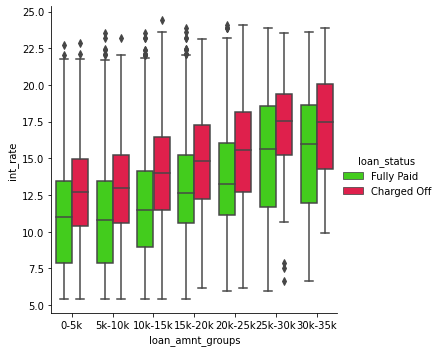

In [77]:
plt.tight_layout()
sns.catplot(data =data,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="prism",kind = 'box')

In [78]:
#In all loan amount groupings, the interest rate on charged off loans is significantly higher than that on completely paid loans.

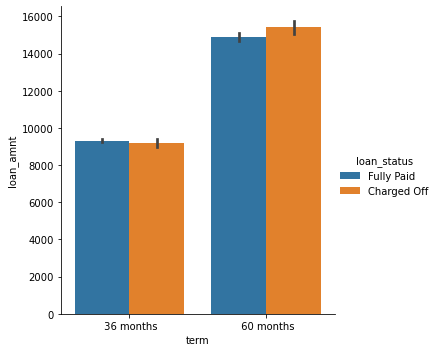

In [79]:
sns.catplot(x = 'term', y = 'loan_amnt', data = data,hue = 'loan_status', kind = 'bar')

In [80]:
#There is no substantial difference in loan amounts between applicants who applied and defaulted.